Observations and Insights

From the bar chart we can see that the number of data points was very much above 100. Thsi is more that the statistical significance whis is usually obtained within a sample size of 30 or greater.

From the pie plot we can see that the distribution between the female and male mice is almost thesame.(50.6%(Males) to 49.4$ (Females).

From the Box plots we can see that Capomulin and Ramicane seemed to be equally effective. However out Of the four drug list (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol showed one outlier data point. Every other drug seemed to good datasets withot having any outliers.

From the Correlation there is no doubt that the Mouse weight had a strong correlation (R-squared of 0.84) with the average tumor volume. However we must understand that this can skew our results if the mouse weight is not controlled.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "/Users/adesolafakiyesi/Desktop/Matplotlib_challenge/data/Mouse_metadata.csv"
study_results_path = "/Users/adesolafakiyesi/Desktop/Matplotlib_challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_table = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
mouse_count = combined_table["Mouse ID"].nunique()
mouse_count

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_table[combined_table.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
 # Optional: Get all the data for the duplicate mouse ID.
duplicate_indices = combined_table[combined_table["Mouse ID"]=='g989'].index

In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_table[~combined_table['Mouse ID'].isin(["g989"])]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [112]:
clean_df[clean_df["Mouse ID"]=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [16]:
 # Checking the number of mice in the clean DataFrame.
mouse_count = clean_df ["Mouse ID"].nunique()
mouse_count

248

# Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_table.groupby('Drug Regimen') ['Tumor Volume (mm3)'].mean()
median = combined_table.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
variance = combined_table.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()   
stdv = combined_table.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
sem = combined_table.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df
                                            

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data = combined_table.groupby(['Drug Regimen']).count().reset_index()


# Alter the DataFrame to two columns
drugs_DataFrame = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_DataFrame = drug_data.set_index("Drug Regimen")

drugs_DataFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


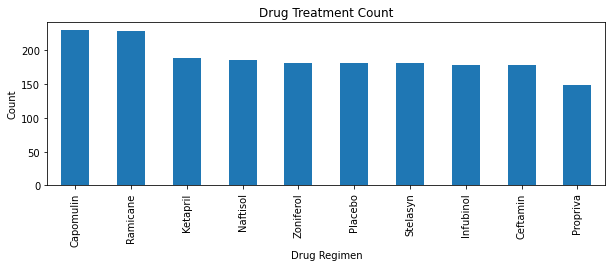

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate the bar plot 
drug_treatment_count =clean_df['Drug Regimen'].value_counts()

drug_treatment_count.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()
plt.tight_layout()


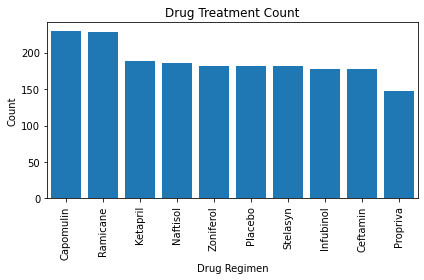

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
clean_df = combined_table[~combined_table['Mouse ID'].isin(["g989"])]
clean_df

drug_list=clean_df.index.tolist()

plt.bar(drug_treatment_count.index.values, drug_treatment_count.values)

drug_treatment_count.plot(kind="bar", figsize=(6,4))
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()


In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_table.groupby(["Sex"]).count()).reset_index()
                         
gender_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [49]:
#Change the Dataframe to reflect two heads
gender_df=gender_df[["Sex", "Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

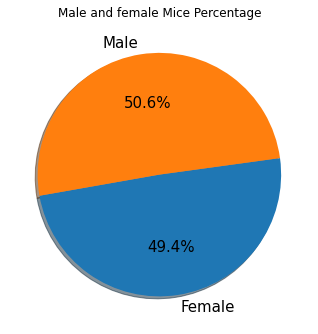

In [50]:
# Plot the Chart
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', 
               startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=15)

plt.title("Male and female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [51]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = combined_table.groupby(["Sex"])["Age_months"].count().tolist()
gender_count

[935, 958]

In [52]:
# Add details to Pie Chart
labels =["Females", "Males"]
colors =["Yellow", "Green"]
explode = [0.1, 0]

(-1.1874943525713364,
 1.1105268056883157,
 -1.1938032889323704,
 1.112116577938631)

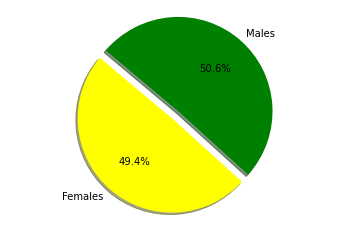

In [53]:
# Create the Pie Chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Quartiles, Outliers and Boxplots 

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [180]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = combined_table.groupby(["Mouse ID"])['Timepoint'].max() 

In [181]:
greatest_timepoint_df.head().reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [161]:
# Sort all the columns accordingly
sorted_df = combined_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
previous_df=sorted_df.loc[sorted_df["Timepoint"] ==45]
previous_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [162]:
# Take the data from Capomulin and reset the index
cap_df = previous_df[previous_df["Drug Regimen"].isin (["Capomulin"])]
cap_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [163]:
# Make column "Tumor Volume(mm3)" a dataframe object
cap_obj = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_obj = cap_obj["Tumor Volume (mm3)"]
cap_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [164]:
# If the data is in dataframe, we would use Pandas to give a percentile calculations
quantile = cap_obj.quantile([.25,.5,.75])
lowerq = quantile[0.25]
upperq = quantile[0.75]
iqr = upperq - lowerq

print(f"The lower quantile of the temperature is: {lowerq}")
print(f"The upper quantile of the temperature is: {upperq}")
print(f"The interquantile range of the temperature is: {iqr}")
print(f"The median of the temperature is: {quantile[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound} could be outliers.")

The lower quantile of the temperature is: 32.37735684
The upper quantile of the temperature is: 40.1592203
The interquantile range of the temperature is: 7.781863460000004
The median of the temperature is: 37.31184577
values below 20.70456164999999 could be outliers.
values above 51.83201549 could be outliers.


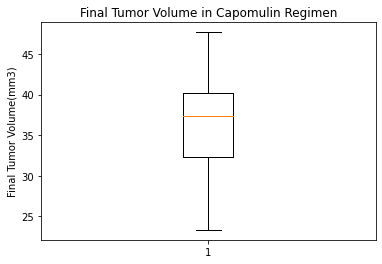

In [165]:
# Generate the Box plot for the final tumor volume for each mouse over the four regimens
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volume in Capomulin Regimen")
axl.set_ylabel("Final Tumor Volume(mm3)")
axl.boxplot(cap_obj)
plt.show()

In [166]:
# Take the data from Ramicane and reset the index
ram_df = previous_df[previous_df["Drug Regimen"].isin (["Ramicane"])]
ram_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1773,a411,45,38.407618,1,Ramicane,Male,3,22
1,1836,a444,45,43.047543,0,Ramicane,Female,10,25
2,1857,a520,45,38.810366,1,Ramicane,Male,13,21
3,1879,a644,45,32.978522,1,Ramicane,Female,7,17
4,1822,c758,45,33.397653,1,Ramicane,Male,9,17


In [167]:
# Make column "Tumor Volume(mm3)" a dataframe object
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [168]:
# If the data is in dataframe, we would use Pandas to give a percentile calculations
quantile = ram_obj.quantile([.25,.5,.75])
lowerq = quantile[0.25]
upperq = quantile[0.75]
iqr = upperq - lowerq

print(f"The lower quantile of the temperature is: {lowerq}")
print(f"The upper quantile of the temperature is: {upperq}")
print(f"The interquantile range of the temperature is: {iqr}")
print(f"The median of the temperature is: {quantile[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound} could be outliers.")

The lower quantile of the temperature is: 30.981175224999998
The upper quantile of the temperature is: 38.508305307499995
The interquantile range of the temperature is: 7.527130082499998
The median of the temperature is: 34.848627300000004
values below 19.690480101250003 could be outliers.
values above 49.79900043124999 could be outliers.


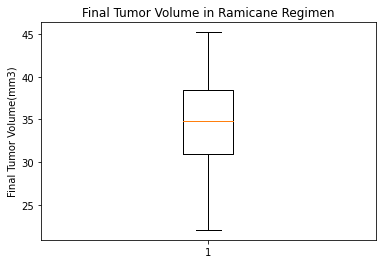

In [169]:
# Generate the Box plot for the final tumor volume for each mouse over the four regimens
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volume in Ramicane Regimen")
axl.set_ylabel("Final Tumor Volume(mm3)")
axl.boxplot(ram_obj)
plt.show()

In [170]:
# Take the data from Infubinol and reset the index
infu_df = previous_df[previous_df["Drug Regimen"].isin (["Infubinol"])]
infu_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1794,a685,45,66.083066,3,Infubinol,Male,8,30
3,1781,c139,45,72.226731,2,Infubinol,Male,11,28
4,1802,e476,45,62.435404,1,Infubinol,Male,23,26


In [171]:
# Make column "Tumor Volume(mm3)" a dataframe object
infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [172]:
# If the data is in dataframe, we would use Pandas to give a percentile calculations
quantile = infu_obj.quantile([.25,.5,.75])
lowerq = quantile[0.25]
upperq = quantile[0.75]
iqr = upperq - lowerq

print(f"The lower quantile of the temperature is: {lowerq}")
print(f"The upper quantile of the temperature is: {upperq}")
print(f"The interquantile range of the temperature is: {iqr}")
print(f"The median of the temperature is: {quantile[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound} could be outliers.")

The lower quantile of the temperature is: 62.75445141
The upper quantile of the temperature is: 67.68556862
The interquantile range of the temperature is: 4.9311172099999965
The median of the temperature is: 66.08306589
values below 55.35777559500001 could be outliers.
values above 75.08224443499999 could be outliers.


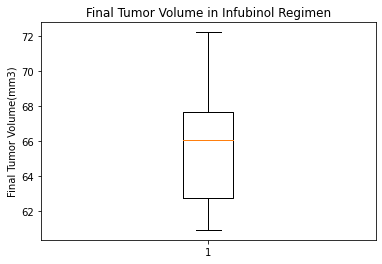

In [173]:
# Generate the Box plot for the final tumor volume for each mouse over the four regimens
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volume in Infubinol Regimen")
axl.set_ylabel("Final Tumor Volume(mm3)")
axl.boxplot(infu_obj)
plt.show()

In [174]:
# Take the data from Ceftamin and reset the index
cef_df = previous_df[previous_df["Drug Regimen"].isin (["Ceftamin"])]
cef_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1,1772,j296,45,61.849023,3,Ceftamin,Female,24,30
2,1858,k210,45,68.923185,3,Ceftamin,Male,15,28
3,1810,l471,45,67.748662,1,Ceftamin,Female,7,28
4,1765,l661,45,59.851956,3,Ceftamin,Male,18,26


In [175]:
# Make column "Tumor Volume(mm3)" a dataframe object
cef_obj = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_obj = cef_obj["Tumor Volume (mm3)"]
cef_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [176]:
# If the data is in dataframe, we would use Pandas to give a percentile calculations
quantile = cef_obj.quantile([.25,.5,.75])
lowerq = quantile[0.25]
upperq = quantile[0.75]
iqr = upperq - lowerq

print(f"The lower quantile of the temperature is: {lowerq}")
print(f"The upper quantile of the temperature is: {upperq}")
print(f"The interquantile range of the temperature is: {iqr}")
print(f"The median of the temperature is: {quantile[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound} could be outliers.")

The lower quantile of the temperature is: 61.43389223
The upper quantile of the temperature is: 67.52748237
The interquantile range of the temperature is: 6.093590140000003
The median of the temperature is: 64.29983003
values below 52.29350701999999 could be outliers.
values above 76.66786758 could be outliers.


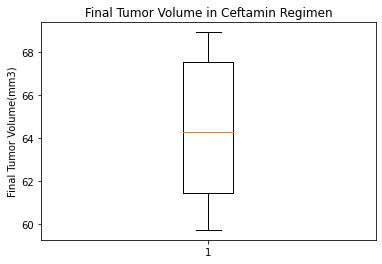

In [177]:
# Generate the Box plot for the final tumor volume for each mouse over the four regimens
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volume in Ceftamin Regimen")
axl.set_ylabel("Final Tumor Volume(mm3)")
axl.boxplot(cef_obj)
plt.show()

In [178]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens(Capomulin, Ramicane, Infubinol, and Ceftamin). Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculating the Greatest Regimens
greatest_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
greatest_regimens = greatest_regimens.sort_values(["Timepoint"], ascending=True)
greatest_regimens

#Getting a smaller DF to work with
greatest_regimens_data = greatest_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

greatest_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


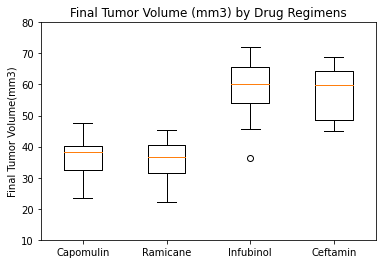

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Grouping by Regimen and Mouse ID 
greatest_regimens_sort = greatest_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
greatest_regimens_sort.head()

# Make the retrieved data into a dataframe to easily rearrange
greatest_regimens_df = greatest_regimens_sort.to_frame()
greatest_regimens_df

#Create a list to use as labels and dataframe
drug_lists = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = greatest_regimens_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(drug_lists)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=drug_lists)
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume(mm3)")
plt.title("Final Tumor Volume (mm3) by Drug Regimens")
plt.show()

# Line and Scatter Plots

In [187]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [188]:
# Get Data from one mouse
capomulin_mouse=capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,228,s185,0,45.000000,0,Capomulin,Female,3,17
43,447,s185,5,43.878496,0,Capomulin,Female,3,17
69,671,s185,10,37.614948,0,Capomulin,Female,3,17
75,714,s185,15,38.177232,0,Capomulin,Female,3,17
105,968,s185,20,36.866876,0,Capomulin,Female,3,17
132,1196,s185,25,33.949940,0,Capomulin,Female,3,17
154,1377,s185,30,32.959671,1,Capomulin,Female,3,17
167,1479,s185,35,28.328531,1,Capomulin,Female,3,17
190,1652,s185,40,25.472143,1,Capomulin,Female,3,17
223,1849,s185,45,23.343598,1,Capomulin,Female,3,17


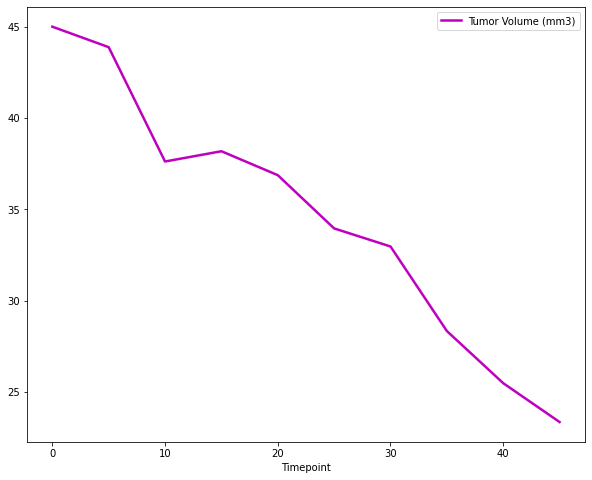

In [191]:
# Rearrange the data into two columns
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Reset the index and generate the line plot showing the tumor volume for the mice treated with Capomulin
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="m")


In [89]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [90]:
#Arrange data into three columns
weight_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.0
1,j246,21,45.0
2,r554,17,45.0
3,s185,17,45.0
4,b742,21,45.0


In [91]:
# Find the average tumor volume for each mouse under the use of capomulin
average_capomulin = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [94]:
# # Change name to Average Volume from Tumor Volume (mm3)
average_capomulin=average_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_capomulin.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


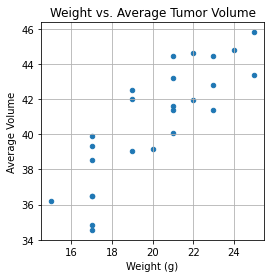

In [95]:
# Create the scatter plot of the Mouse weight and the Average Tumor Volume for Capomulin

average_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")

plt.grid=(True)
plt.show()

In [96]:
# Find the average tumor volume for each mouse under the use of capomulin
average_capomulin = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


# Correlation and Regression

In [519]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = round(st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])[0],2)

print("The correlation coefficient between between mouse weight and average tumor volume is", {correlation})

The correlation coefficient between between mouse weight and average tumor volume is {0.84}


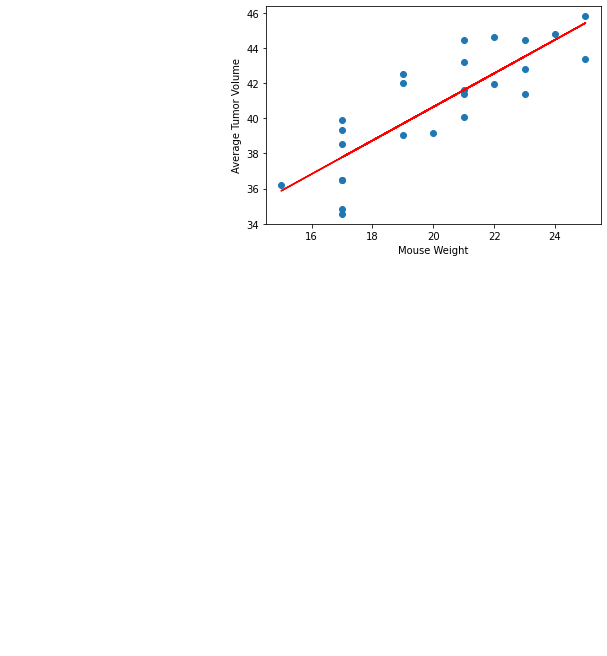

In [400]:
# import linregress
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = average_capomulin["Weight (g)"]
y_values = average_capomulin["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()